## Mitsiu Alejandro Carreño Sarabia - E23S-18014
Asociación de variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

params = {
    'legend.fontsize': "x-large",
    'figure.figsize': (10, 7.5),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

np.set_printoptions(precision=2)
%precision 2

'%.2f'

In [2]:
casas_file='s14_precios_casas.csv'
casas = pd.read_csv(casas_file)
casas.head()

,fecha,precio_USD,area_m2_util,area_m2_construida,habitaciones,baños,pisos,año_construida
0,2014-05-29,485000.0,148.6,399.5,4,1.00,1.5,1916
1,2015-03-04,570000.0,117.1,309.2,3,1.75,1.0,1905
2,2014-06-26,518500.0,147.7,102.4,3,3.50,3.0,2010
3,2014-06-13,822500.0,215.5,460.8,5,3.50,2.0,1926
4,2014-11-04,511000.0,132.9,321.0,3,1.00,1.0,1947


In [3]:
print("Número de casas:", len(casas))
print("Número de habitaciones:", sorted(casas["habitaciones"].unique()))

Número de casas: 602
Número de habitaciones: [1, 2, 3, 4, 5, 6, 7, 9, 33]


La manera más efectiva de verificar si existe una relación entre dos variables es mediante el uso de visualizaciones, la visualización más empleada es el gráfico de puntos.

Text(0.5, 1.0, 'Análisis de relación entre precio y área')

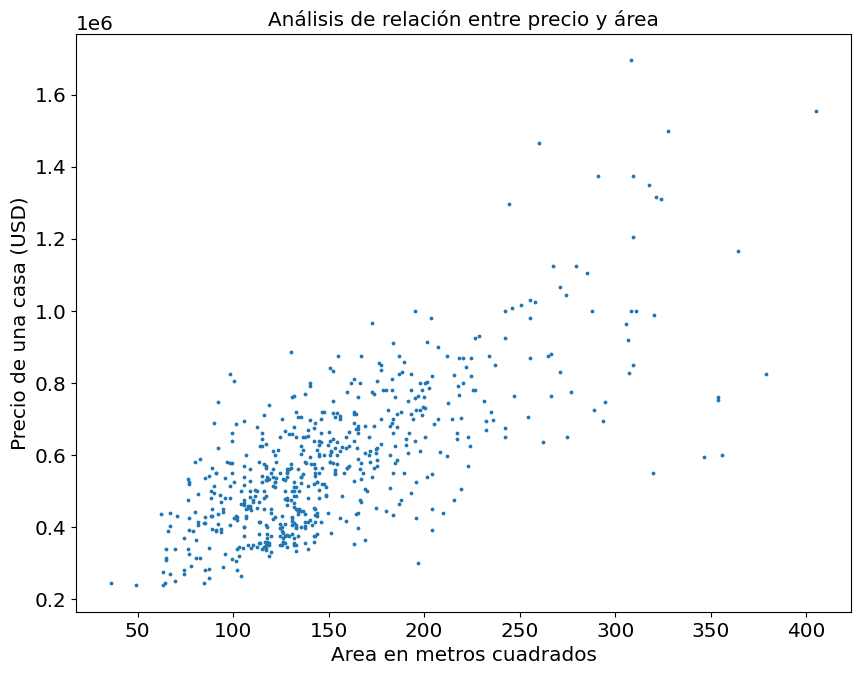

In [4]:
casas.plot.scatter(x="area_m2_util", y="precio_USD", s=3);
plt.xlabel("Area en metros cuadrados")
plt.ylabel("Precio de una casa (USD)")
plt.title("Análisis de relación entre precio y área")

## Covarianza
Indica el grado de variación conjunta de dos variables respecto a sus medias

Dadas dos variables estadísticas x e y definiremos la covarianza $S_{xy}$ como

$S_{xy} = \frac{1}{n} \sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})$

Donde:      
n corresponde al total de registros      
$\overline{x}$ correspone a la media de x      
$\overline{y}$ corresponde a la media de y     

Desarrollando algebraicamente la fórmula de covarianza podemos llegar a:       
$S_{xy} = \frac{1}{n} \big(\sum_{i=1}^n x_i\cdot y_i \big) - \overline{x} \cdot \overline{y}$      
    
usaremos cov() (covarianza) de pandas

In [5]:
casas[['precio_USD', 'area_m2_util']].cov()

,precio_USD,area_m2_util
precio_USD,4.366086e+10,9.069569e+06
area_m2_util,9.069569e+06,3.444799e+03


cov() devuelve una matriz que entrega la covarianza entre todas las variables de interés. El valor que nos interesa es fil 1 col 2 que corresponde a la covarianza entre los campos precio_USD y area_m2_util      
       
             
<strong>Podemos notar que el valor de la covarianza es $9.07 \times 10^6$ este valor es positivo y mucho mayor que cero, por lo que podemos concluir que existe una dependencia directa o positiva entre ambas variables</strong>

In [6]:
casas[['precio_USD', 'año_construida']].cov()

,precio_USD,año_construida
precio_USD,4.366086e+10,-1.213920e+06
año_construida,-1.213920e+06,1.725496e+03


Podemos notar que el valor de la covarianza es $-1.21 \times 10^6$ entre precio_usd y año_construida.    
Este valor es negativo y mucho menor que cero, por lo cual podemos concluir que <strong>existe una dependencia inversa o negativa entre ambas partes</strong>

## Correlación
Si bien la covarianza cumple con el objetivo de medir el grado de asociació entre dos variables, está sufre de algunos inconvenientes. El primer inconveniente es que no tiene valores máximo ni mínimo, el segundo es que su valor depende de las unidades de medida de las variables.    
Dada esta situación, es conveniente definir la correlacion y sus respectivos coeficientes.
<strong>La correlación es la cantidad que indica la fuerza y la dirección de una relación líneal y proporcionalidad entre dos variables estadísticas</strong>

Dadas dos variables estadísticas x e y, el coeficiente de correlación de Pearson $r_{xy}$ se define como:      
$r_{xy} = \frac{S_{xy}}{S_x S_y}$

El coeficiente de correlación de Pearson se interpreta de modo análogo a la covarianza pero, al osilar entre -1 y 1 como máximo, la interpretación del mismo resulta más intuitiva a la vez que facilita el establecimiento de comparaciones entre dos coeficientes obtenidos para conjuntos de datos distintos

Usaremos corr() (correlation) de pandas para determinar el coeficiente

In [7]:
casas[['precio_USD', 'area_m2_util']].corr()

,precio_USD,area_m2_util
precio_USD,1.000000,0.739535
area_m2_util,0.739535,1.000000


El resultado corresponde a una matriz que entrega el coeficiente de correlación entre todas las variables de interés.Podemos notar que el valor del coeficiente de correlación es $0.74$. <strong>Este valor es positivo y cercano a uno, por lo cual podemos concluir que existe una relación directa entre ambas variables y su correlación es alta</strong>

Analicemos la correlación entre precio_usd y año_construida

In [8]:
casas[['precio_USD', 'año_construida']].corr()

,precio_USD,año_construida
precio_USD,1.000000,-0.139858
año_construida,-0.139858,1.000000


Podemos notar que el valor del coeficiente de correlación es -0.14. Este valor es negativo y más cercano al valor cero, por lo cual podemos concluir que existe una dependencia inversa entre ambas variables y su correlación es baja